In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

# Load the cleaned datasets
benin = pd.read_csv('data/benin_clean.csv')
sierra_leone = pd.read_csv('data/sierraleone_clean.csv')
togo = pd.read_csv('data/togo_clean.csv')

In [6]:
# Add a country column
benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine datasets
combined_data = pd.concat([benin, sierra_leone, togo], ignore_index=True)

In [8]:
combined_data[:2]

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,TModB,Comments,GHI_outlier,DNI_outlier,DHI_outlier,ModA_outlier,ModB_outlier,WS_outlier,WSgust_outlier,Country
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,...,24.4,NaN,False,False,False,False,False,False,False,Benin
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,...,24.4,NaN,False,False,False,False,False,False,False,Benin


Metric Comparison

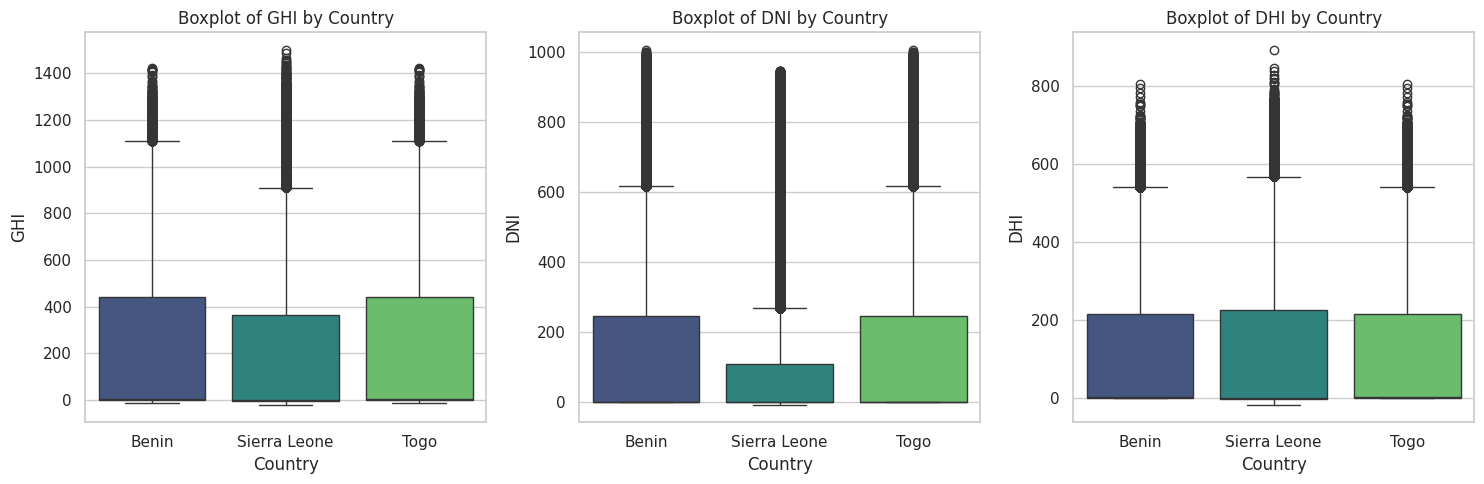

In [31]:
# Boxplots
metrics = ['GHI', 'DNI', 'DHI']
plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Country', y=metric, data=combined_data, palette='viridis')
    plt.title(f'Boxplot of {metric} by Country')
    plt.ylabel(metric)
    plt.xlabel('Country')
plt.tight_layout()
plt.show()

Summary Table

In [32]:
summary_table = combined_data.groupby('Country')[metrics].agg(['mean', 'median', 'std'])
print("\nSummary Table of Solar Metrics by Country:")
print(summary_table)


Summary Table of Solar Metrics by Country:
                     GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         230.555040    2.1  322.532347  151.258469    0.0  250.956962   
Sierra Leone  201.957515    0.3  298.495150  116.376337   -0.1  218.652659   
Togo          230.555040    2.1  322.532347  151.258469    0.0  250.956962   

                     DHI                     
                    mean median         std  
Country                                      
Benin         116.444352    2.5  156.520714  
Sierra Leone  113.720571   -0.1  158.946032  
Togo          116.444352    2.5  156.520714  


Statistical Testing

Bar Chart Ranking Countries by Average GHI

In [ ]:
import warnings
warnings.filterwarnings("ignore")

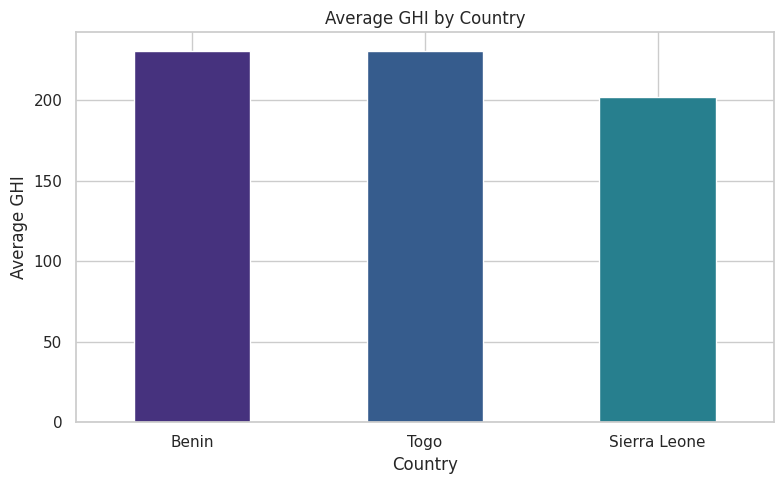

In [35]:
# Bar chart ranking countries by average GHI
average_ghi = combined_data.groupby('Country')['GHI'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
average_ghi.plot(kind='bar', color=sns.color_palette('viridis'))
plt.title('Average GHI by Country')
plt.ylabel('Average GHI')
plt.xlabel('Country')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()